In [57]:
# Data loading - loan.csv to loan data frame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

loan=pd.read_csv("loan.csv" , encoding='palmos')

/Users/amithkumarbhn/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
#Data Cleaning of loan.csv

# To see the percentage of nulls in each column

round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [59]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [60]:
# Removing columns with more than 30% nulls - as 32% is for description column, 64% is for months_delinq which are
# mostly not needed; Most of columns are 100% nulls. Hence taken cut off as 30%.

loan = loan.drop(loan.columns[loan.apply(lambda col: round(100*(col.isnull().sum())/len(loan.index),2) > 30)], axis=1)

In [61]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [62]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [63]:
# Dropping columns that are mostly not needed in the analysis as it's having only single value for entire column

loan=loan.drop('policy_code', axis=1) # Value is n for all
loan=loan.drop('application_type', axis=1) # Value is Individual for all
loan=loan.drop('acc_now_delinq', axis=1) # Value is 0 for all
loan=loan.drop('chargeoff_within_12_mths',axis=1) # Value is 0 for all
loan=loan.drop('collections_12_mths_ex_med',axis=1) # Value is 0 for all
loan=loan.drop('delinq_amnt', axis=1) # Value is 0 for all
loan=loan.drop('tax_liens',axis=1) # Value is 0 for all
loan=loan.drop('out_prncp',axis=1) # Value is 0 for most of the data
loan=loan.drop('out_prncp_inv',axis=1) # Value is 0 for most of the data
loan=loan.drop('pymnt_plan',axis=1) # Value is n for all
loan=loan.drop('initial_list_status',axis=1) # Value is f for all

In [64]:
loan.shape

(39717, 42)

In [65]:
# To check if any rows are having more than 5 null values

print(len(loan[loan.isnull().sum(axis=1)>5])/len(loan.index)*100)

0.0


In [66]:
# Selecting only the data set which has loan_status != Current

loan=loan[loan['loan_status'].str.contains('Fully Paid') | loan['loan_status'].str.contains('Charged Off')]

In [67]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 42 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
purpose   

In [68]:
# Changing data type of issue date column
loan['issue_d'] =  pd.to_datetime(loan['issue_d'].str.upper(), format='%b-%y', yearfirst=False)

# Create a new column with issue year
loan['issue_year']=loan['issue_d'].dt.year

# Create a new column with term in years
def reformatTerm(x):
    return int(x.strip().split(' ')[0])/12
loan['term_in_years']=loan['term'].apply(reformatTerm)

# Add a new column with Status code 1= Charged Off, 0= Fully Paid
loan['defaulted'] = loan['loan_status'].map(lambda x: 1 if "Charged Off" in x else 0)

# Reformat int_rate to remove percentage
loan[['int_rate']]= loan['int_rate'].str.split('%').str[0]

# Reformat int_rate to remove percentage
loan[['revol_util']]= loan['revol_util'].str.split('%').str[0]

# Reformat emp_lenght to integer values
loan['emp_length']= loan['emp_length'].str.extract('(\d+)')

In [69]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null datetime64[ns]
loan_status                38577 non-null object
url                        38577 non-null object
pu

In [70]:
# Selecting data frames seperately for Charged Off and Fully Paid and plotting against count of purpose

loan_charged_off = loan[loan['loan_status']=='Charged Off']
loan_paid = loan[loan['loan_status']=='Fully Paid']

loan_charged_off_plt=loan_charged_off.groupby('purpose')['loan_status'].count().sort_values(ascending=False)
loan_paid_plt=loan_paid.groupby('purpose')['loan_status'].count().sort_values(ascending=False)

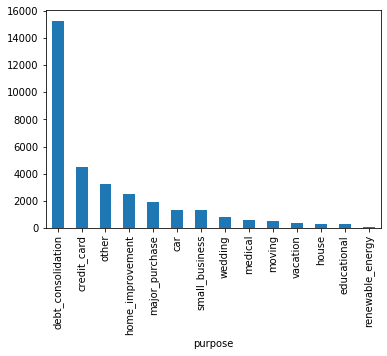

In [71]:
loan_paid_plt.plot(kind='bar')

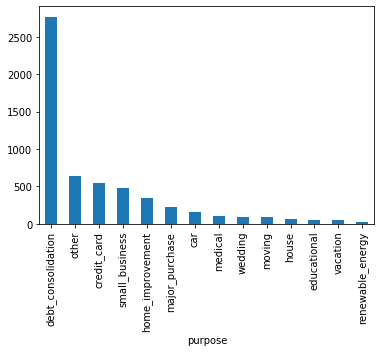

In [72]:
loan_charged_off_plt.plot(kind='bar')

## Univariate Analysis

### To check how many bankruptcies against purpose with loan status

**"When Purpose = House loan, there are maximum public record bankruptcies"**

/Users/amithkumarbhn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


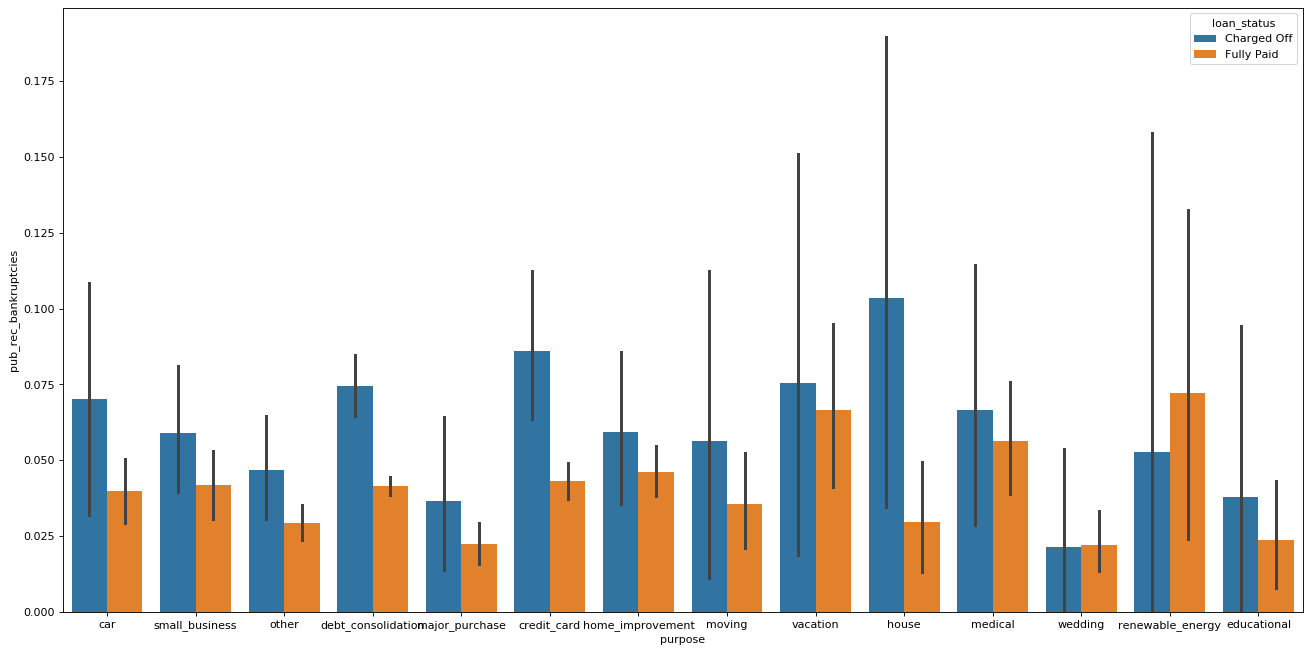

In [73]:
# Plot with number of bankruptcies against purpose with loan status as hue

# List of dataframes to concat
pdList = [loan_charged_off, loan_paid]  
plot_df = pd.concat(pdList)

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='purpose', y='pub_rec_bankruptcies', hue="loan_status", data=plot_df)
plt.show()

### To check which purpose has maximum defaulted loan status

**"When Purpose = Small Business loan, there is maximum default chances"**

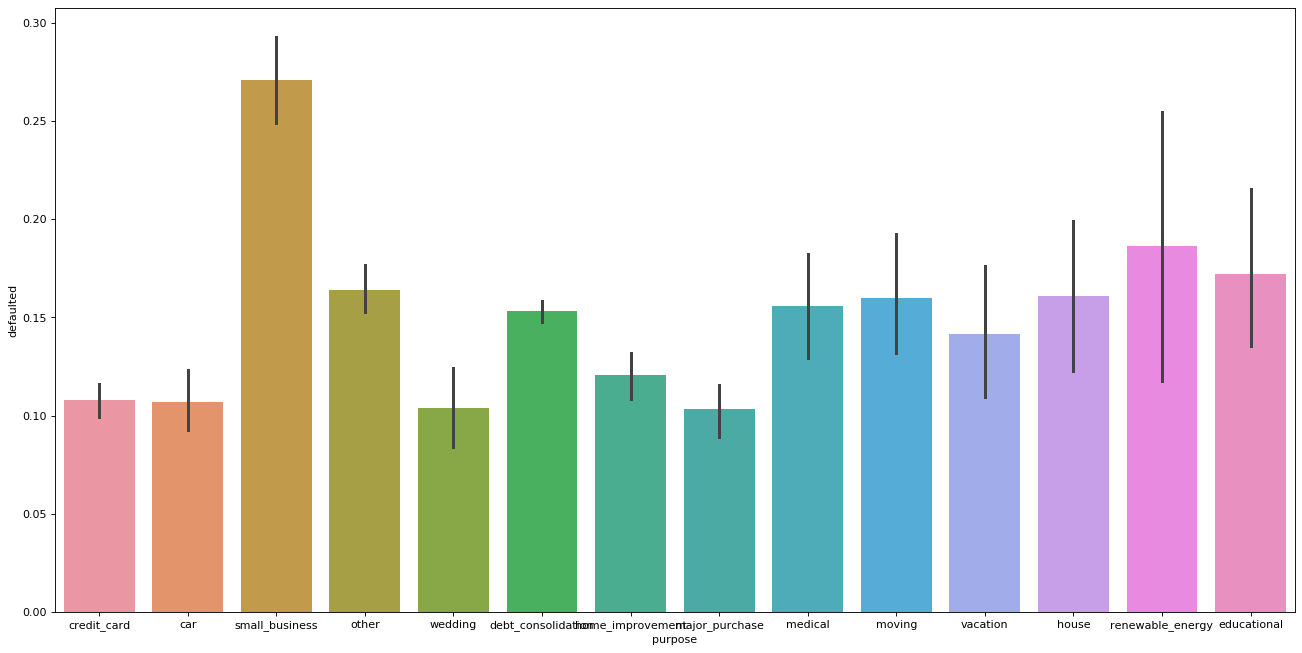

In [74]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='purpose', y='defaulted', data=loan)
plt.show()

### To check which purpose has maximum defaulted loan status against term of the loan

**"In 60 months term: When Purpose = Educational loan, there is maximum default chances, Followed by Small Business loan."**

**"In 36 months term: When Purpose = Renewable energy, there is maximum default chances, Followed by Small Business loan."**

**"Similarly, More loans with 36 months (shorted term) can be given for less defaulted purposes like Credit card, car."**

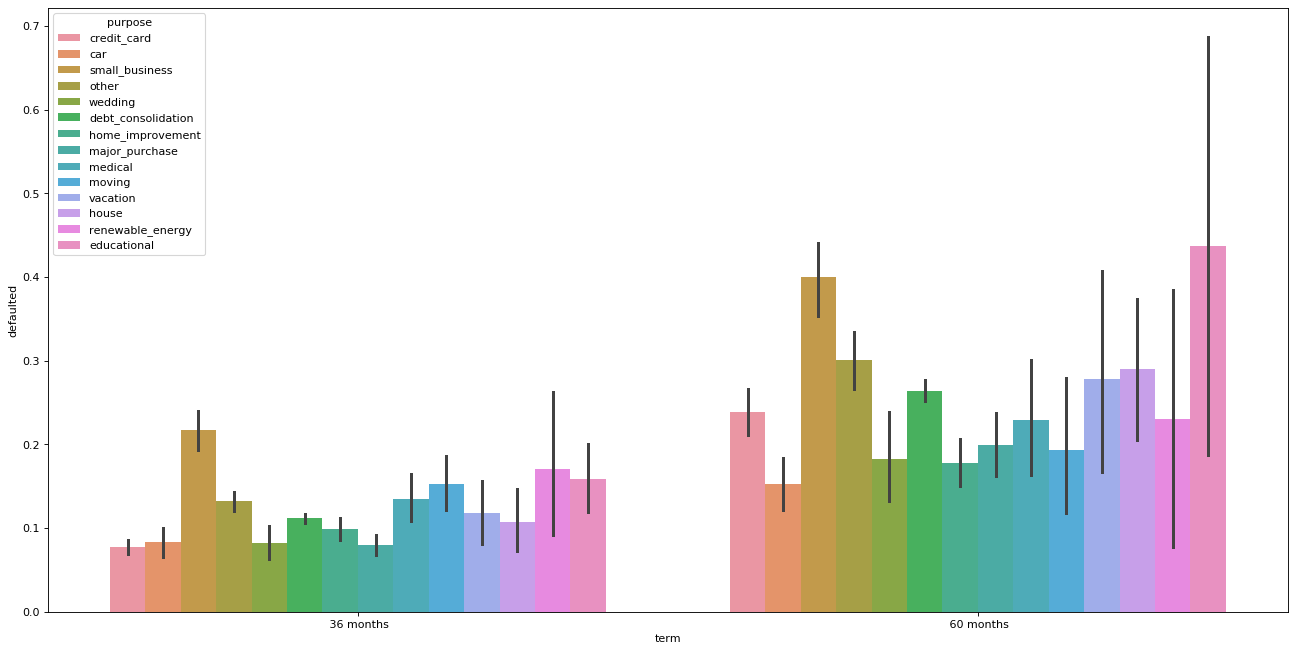

In [75]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='term', y='defaulted', hue="purpose", data=loan)
plt.show()

### To check verification status of loan against annual income with loan status

**"Verified loans with borrowers of more annual income have defaulted more. Need to check the quality of verification done."**

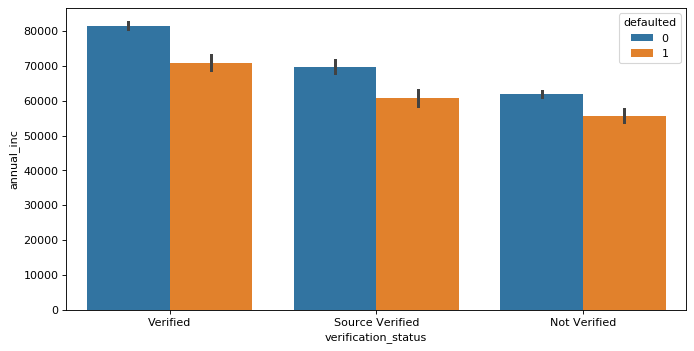

In [76]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='verification_status', y='annual_inc', hue="defaulted", data=loan)
plt.show()

### To check verification grades of loan against defaulted with verification status

**"Grade - G has maximum default chances. Non-Verified has highest, followed by Source verified."**

**"Grade - F is next highest default chances. Source verified has highest, followed by verified."**

**"Need to monitor the verification authorities for these two grades"**

**"Similarly, Grade - A, which defaulted less, can be given more loans"**

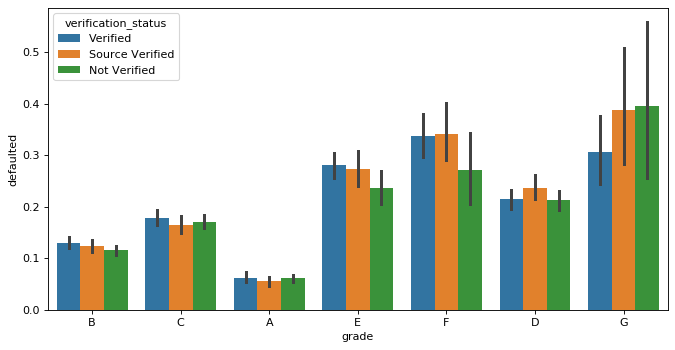

In [77]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='grade', y='defaulted', hue="verification_status", data=loan)
plt.show()

### To check verification sub grades against loan amount with defaulted data only

**"Grade - F5 has taken more loan amount and defaulted more. Followed by G3 and G4."**

**"Need to monitor these sub grades verification process in sanctioning loans"**

**"Similarly, A2, which defaulted less, can be given more loans"**

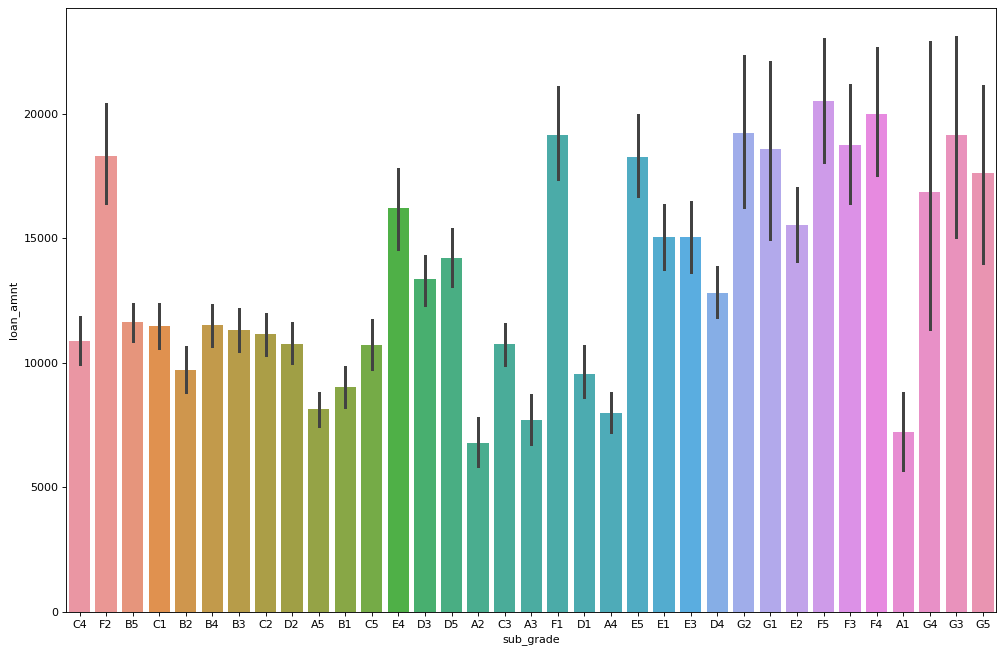

In [78]:
# Taking only loan charged off data frame for this plot to see only sub grades that have defaulted.

plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='sub_grade', y='loan_amnt', data=loan_charged_off)
plt.show()

### To check emp_length against dti 

**"Individuals of any emp_length with dti > 12.5% should not be given loans"**

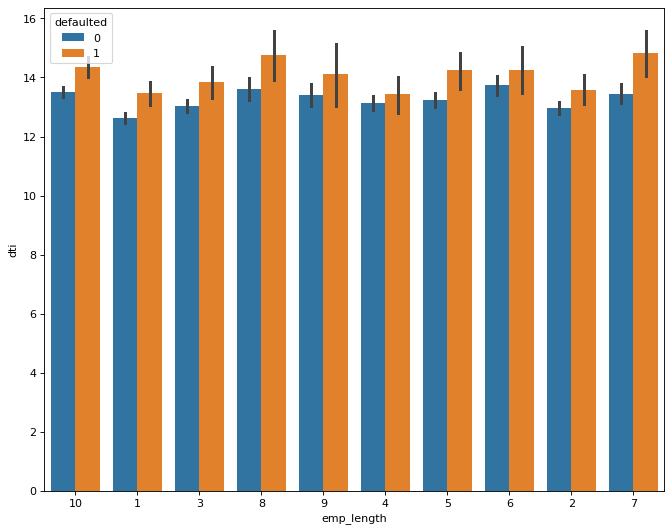

In [79]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='emp_length', y='dti', hue="defaulted", data=loan)
plt.show()

### To check the loan amount taken against employment length of the individual

**"Borrowers with 10+ emp_length with higher loan amounts have defaulted more. Followed by 7 years"**

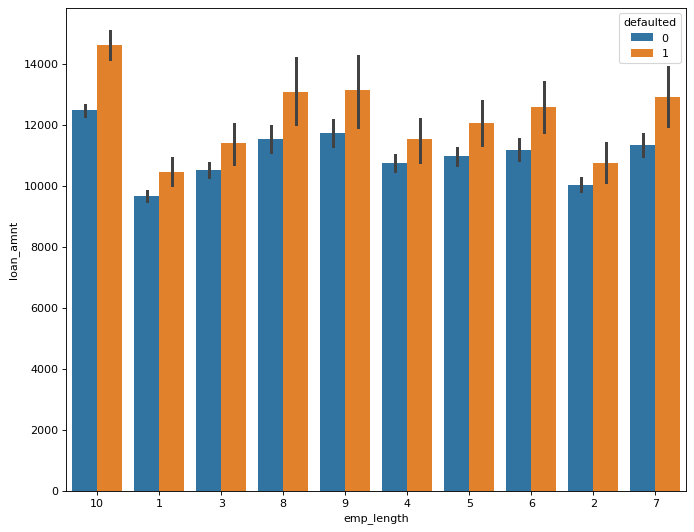

In [80]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='emp_length', y='loan_amnt', hue="defaulted", data=loan)
plt.show()

### The number of credit lines of borrower when 38 & 33 has more default rate

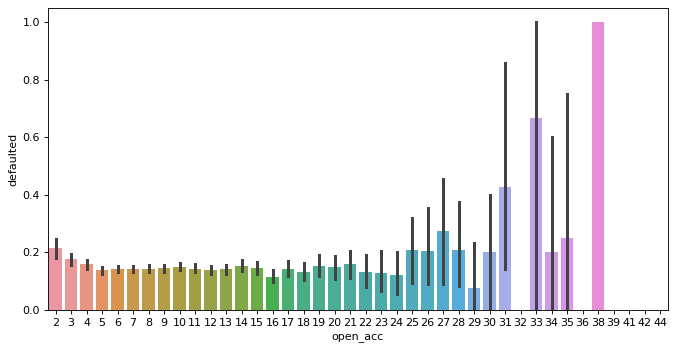

In [81]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='open_acc', y='defaulted', data=loan)
plt.show()

### Nebaraska has higher default rate when compared to other states

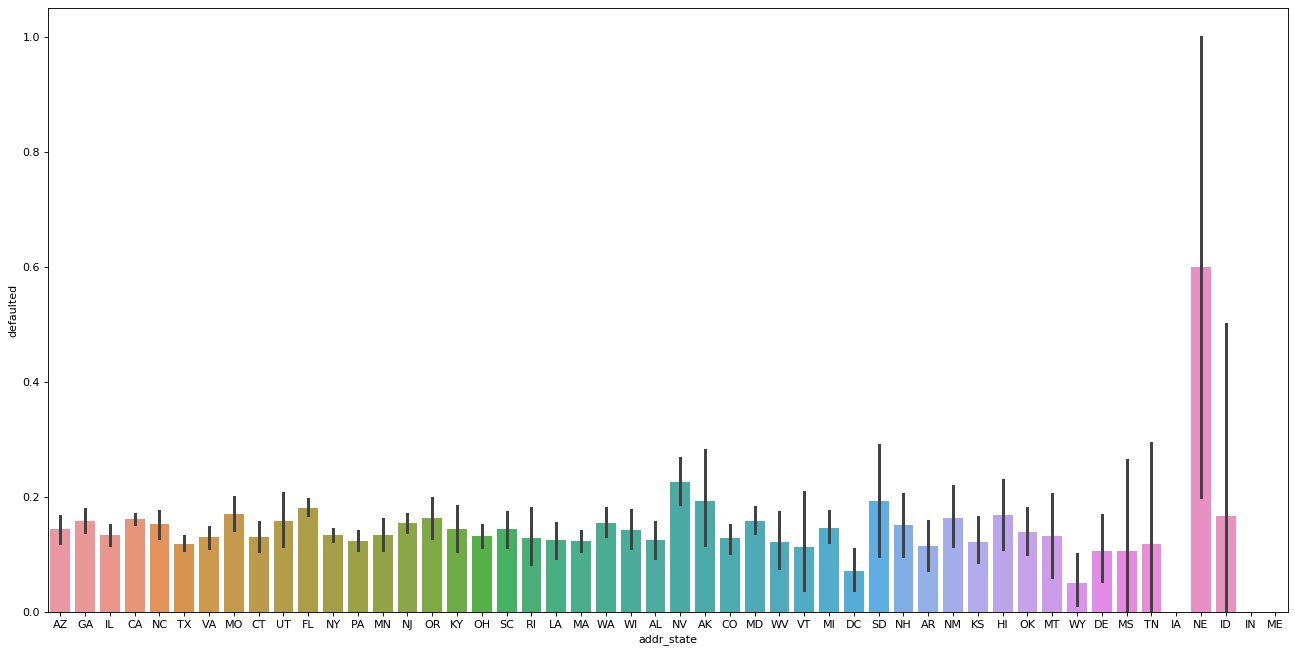

In [82]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='addr_state', y='defaulted', data=loan)
plt.show()

### The default % is more for Debt consolidation purpose of loans

In [83]:
# Create a cross tab with default rate against purpose and plot

default_rate_purpose = pd.crosstab(loan['defaulted'],loan['purpose']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
default_rate_purpose

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
defaulted,,,,,,,,,,,,,,
0,4.06,13.61,46.40,0.82,7.67,0.93,5.85,1.75,1.47,9.81,0.25,3.88,0.98,2.52
1,2.84,9.63,49.17,1.00,6.17,1.05,3.95,1.88,1.63,11.25,0.34,8.44,0.94,1.71


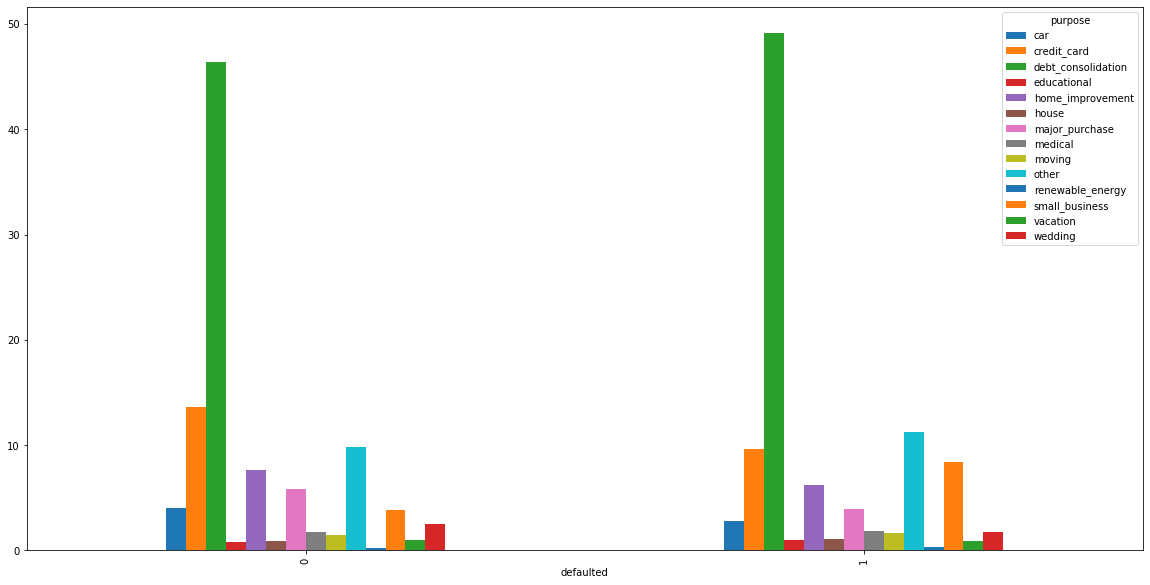

In [84]:
default_rate_purpose.plot(kind='bar', figsize=(20,10))

### The default % is more in the year 2011

In [85]:
default_rate_year = pd.crosstab(loan['defaulted'],loan['issue_year']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
default_rate_year

issue_year,2007,2008,2009,2010,2011
defaulted,,,,,
0,0.63,3.99,12.51,30.49,52.38
1,0.80,4.39,10.56,26.39,57.86


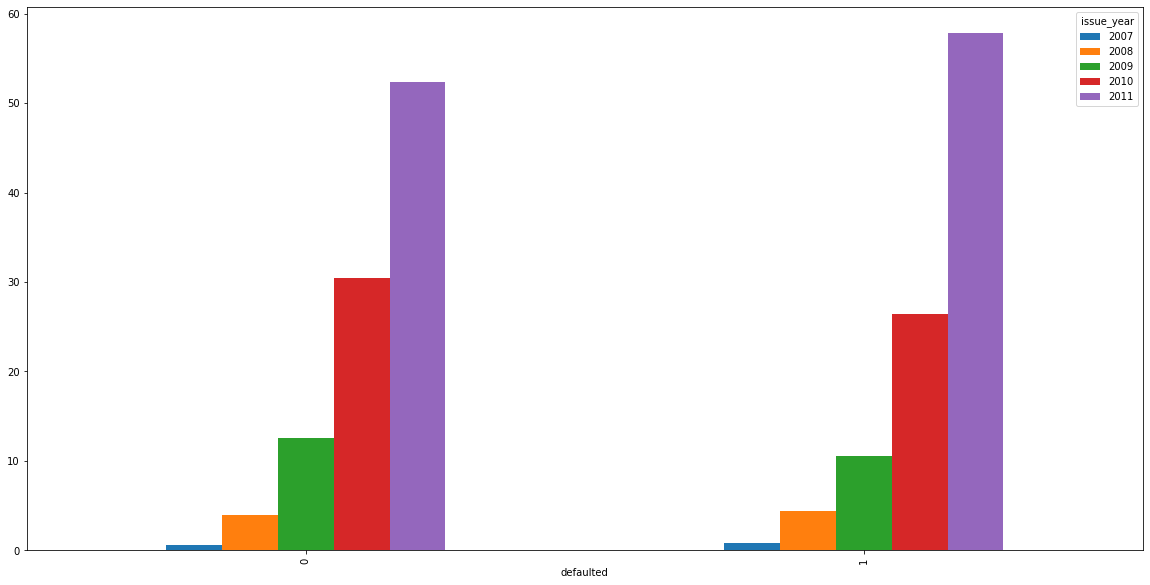

In [86]:
default_rate_year.plot(kind='bar', figsize=(20,10))

### Loan amounts given are more in 2011 and so are default chances

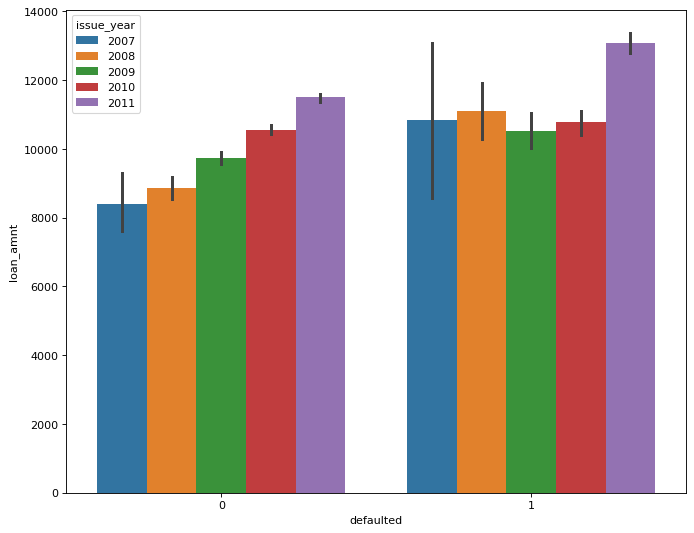

In [87]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='defaulted', y='loan_amnt', hue="issue_year", data=loan)
plt.show()

### For 2011, House loans and Small business are given more and they are maximum defaulted [Only Charged Off data taken]

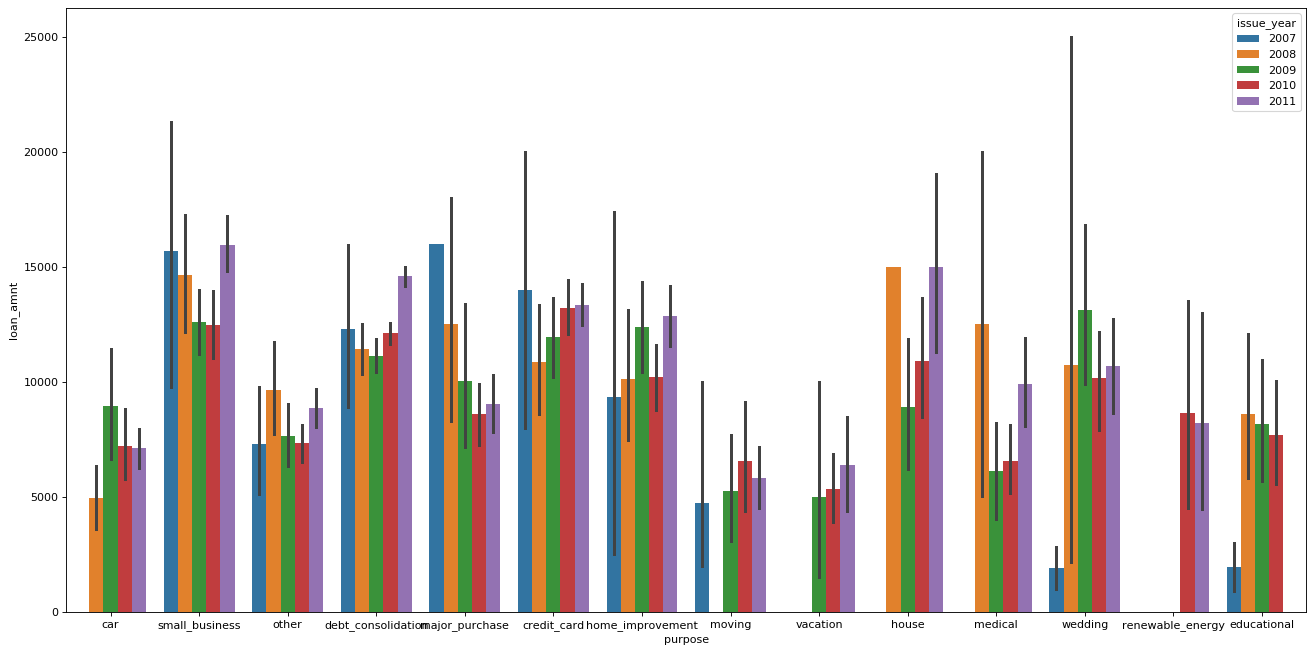

In [88]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='purpose', y='loan_amnt', hue="issue_year", data=loan_charged_off)
plt.show()

### To check default % for term

In [89]:
default_rate_term = pd.crosstab(loan['defaulted'],loan['term']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
default_rate_term

term,36 months,60 months
defaulted,,
0,78.51,21.49
1,57.35,42.65


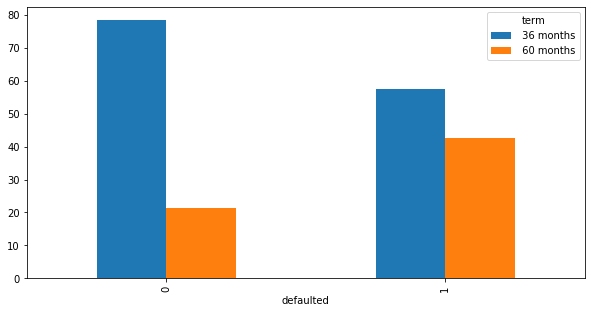

In [90]:
default_rate_term.plot(kind='bar', figsize=(10,5))

In [91]:
default_rate_emplength = pd.crosstab(loan['defaulted'],loan['emp_length']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
default_rate_emplength

emp_length,1,10,2,3,4,5,6,7,8,9
defaulted,,,,,,,,,,
0,20.48,22.26,11.59,10.75,8.96,8.51,5.79,4.50,3.83,3.32
1,20.28,24.65,10.50,10.28,8.56,8.48,5.69,4.87,3.76,2.93


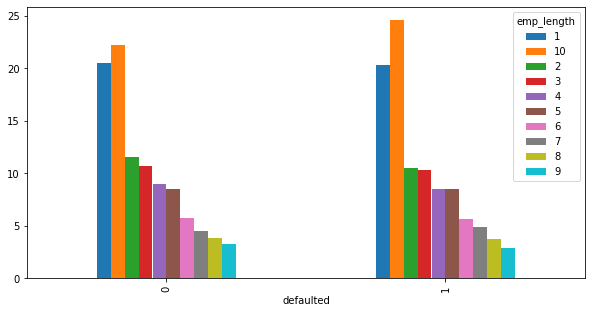

In [92]:
default_rate_emplength.plot(kind='bar', figsize=(10,5))

## Segmented Univariate Analysis

### Binning funded_amnt, loan_amnt, annual_inc, dti, int_rate

In [93]:
loan['funded_amnt_bin']=pd.cut(loan['funded_amnt'], bins=np.linspace(0, 35000, 8))

range1 = pd.interval_range(start=0, freq=5000, end=35000)
loan['loan_amnt_bin']=pd.cut(loan['loan_amnt'], bins=range1)


range2 = pd.interval_range(start=0, freq=10000, end=250000)
loan['annual_inc_bin']=pd.cut(loan['annual_inc'], bins=range2)


range3 = pd.interval_range(start=0.0, freq=5.0, end=30.0)
loan['dti_bin']=pd.cut(loan['dti'], bins=range3)


range4 = pd.interval_range(start=5.0, freq=5.0, end=25.0)
loan['int_rate_bin']=pd.cut(loan['int_rate'], bins=range4)

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,issue_year,term_in_years,defaulted,funded_amnt_bin,loan_amnt_bin,annual_inc_bin,dti_bin,int_rate_bin
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,May-16,0.0,2011,3.0,0,"(0.0, 5000.0]","(0, 5000]","(20000, 30000]","(25.0, 30.0]","(10.0, 15.0]"
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Sep-13,0.0,2011,5.0,1,"(0.0, 5000.0]","(0, 5000]","(20000, 30000]","(0.0, 5.0]","(15.0, 20.0]"
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,May-16,0.0,2011,3.0,0,"(0.0, 5000.0]","(0, 5000]","(10000, 20000]","(5.0, 10.0]","(15.0, 20.0]"
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Apr-16,0.0,2011,3.0,0,"(5000.0, 10000.0]","(5000, 10000]","(40000, 50000]","(15.0, 20.0]","(10.0, 15.0]"
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Jan-16,0.0,2011,3.0,0,"(0.0, 5000.0]","(0, 5000]","(30000, 40000]","(10.0, 15.0]","(5.0, 10.0]"


### Borrowers with Annual income range (210000 - 220000) have more defaults

/Users/amithkumarbhn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


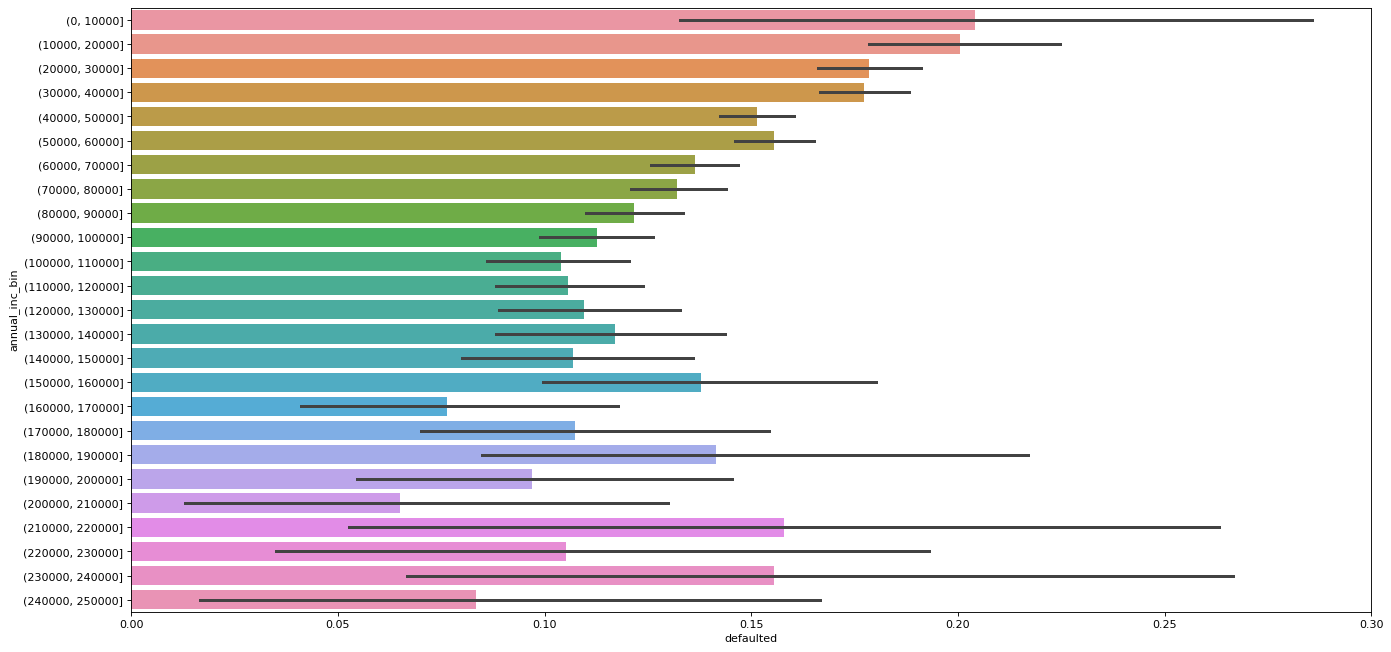

In [94]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='defaulted', y='annual_inc_bin', data=loan)
plt.show()

In [95]:
funded_amnt_purpose=loan.groupby(['purpose','funded_amnt_bin'])['defaulted'].sum().reset_index()
funded_amnt_purpose.head()

,purpose,funded_amnt_bin,defaulted
0,car,"(0.0, 5000.0]",68
1,car,"(5000.0, 10000.0]",60
2,car,"(10000.0, 15000.0]",21
3,car,"(15000.0, 20000.0]",7
4,car,"(20000.0, 25000.0]",4


### Funded amount of range (5000-10000) with Debt Consolidation as loan has maximum defaults

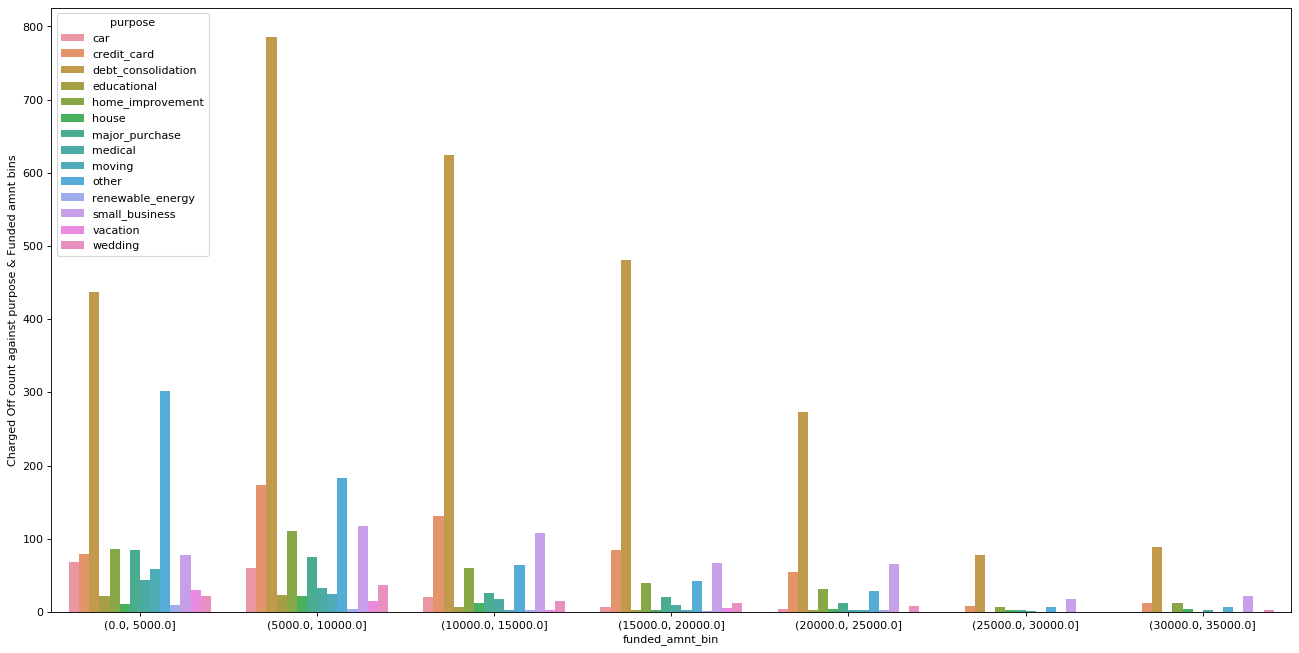

In [96]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='funded_amnt_bin', y='defaulted', hue="purpose",data=funded_amnt_purpose)
plt.ylabel('Charged Off count against purpose & Funded amnt bins')
plt.show()

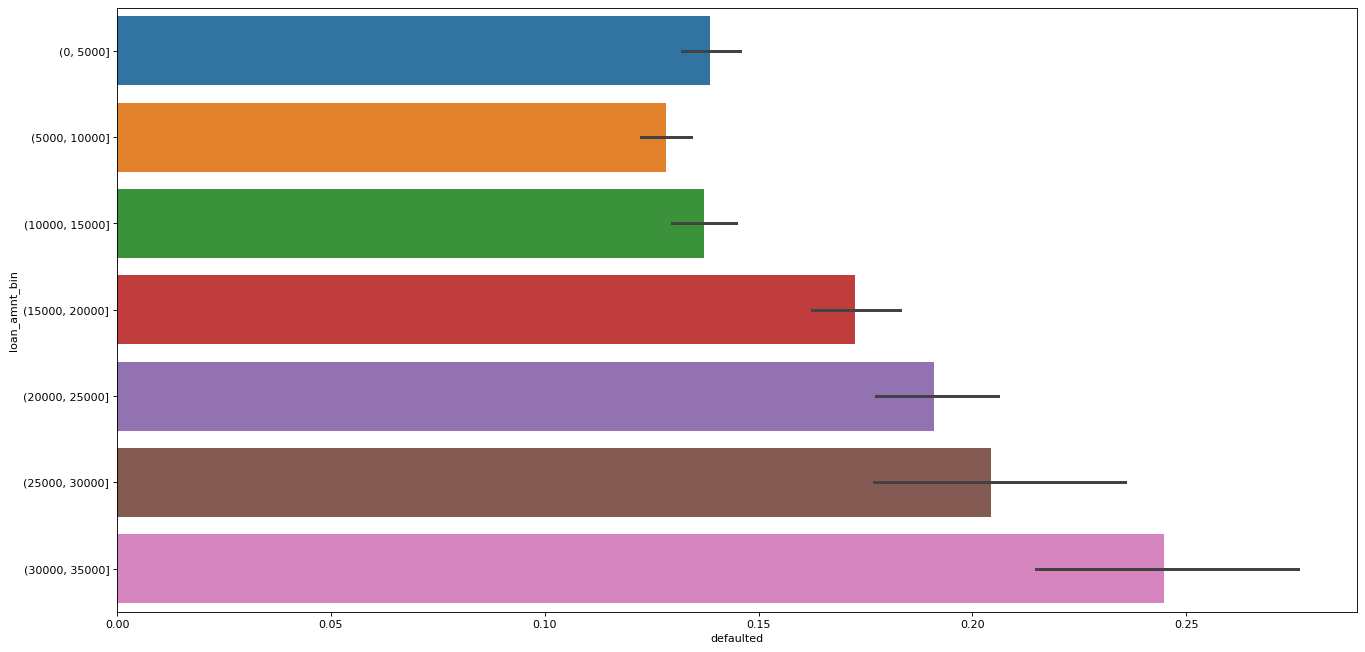

In [97]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='defaulted', y='loan_amnt_bin', data=loan)
plt.show()

In [98]:
loan_amnt_purpose=loan.groupby(['purpose','loan_amnt_bin'])['defaulted'].sum().reset_index()
loan_amnt_purpose.head()

,purpose,loan_amnt_bin,defaulted
0,car,"(0, 5000]",67
1,car,"(5000, 10000]",61
2,car,"(10000, 15000]",21
3,car,"(15000, 20000]",7
4,car,"(20000, 25000]",4


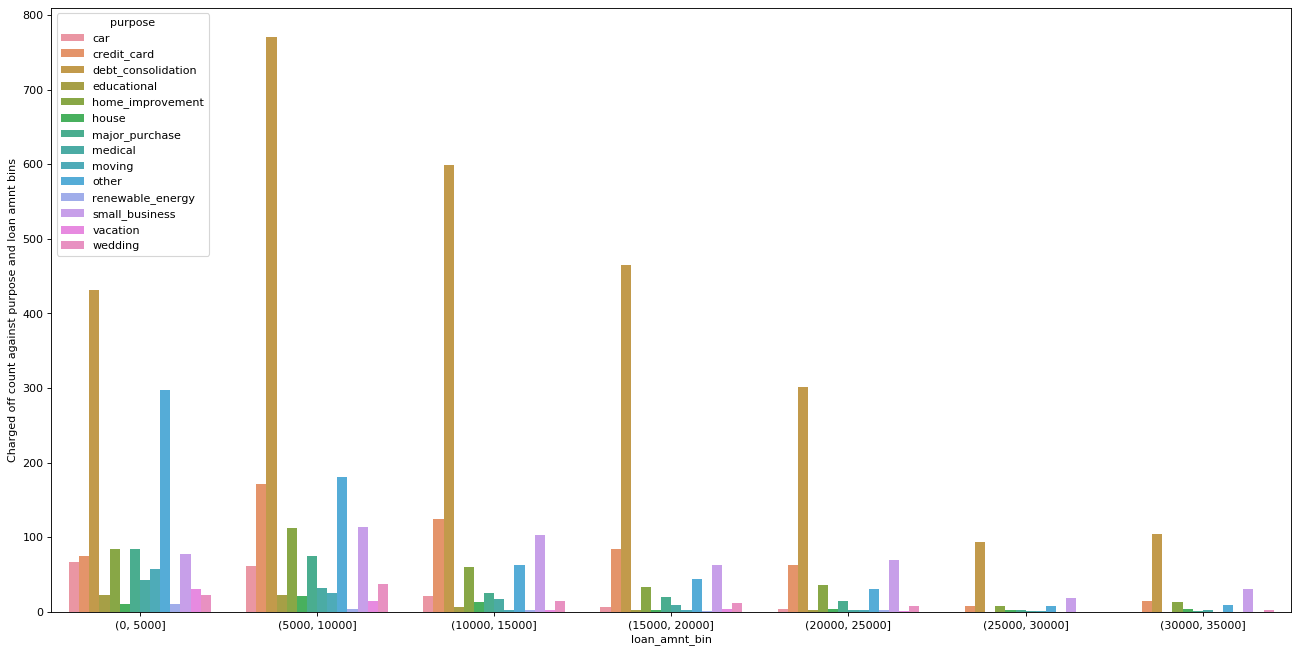

In [99]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='loan_amnt_bin', y='defaulted', hue="purpose",data=loan_amnt_purpose)
plt.ylabel('Charged off count against purpose and loan amnt bins')
plt.show()

In [100]:
dti_purpose=loan.groupby(['purpose','dti_bin'])['defaulted'].sum().reset_index()
dti_purpose.head()

,purpose,dti_bin,defaulted
0,car,"(0.0, 5.0]",29
1,car,"(5.0, 10.0]",33
2,car,"(10.0, 15.0]",48
3,car,"(15.0, 20.0]",24
4,car,"(20.0, 25.0]",23


### DTI with range (15.0 - 20.0) has maximum defaults for Debt consolidation purpose

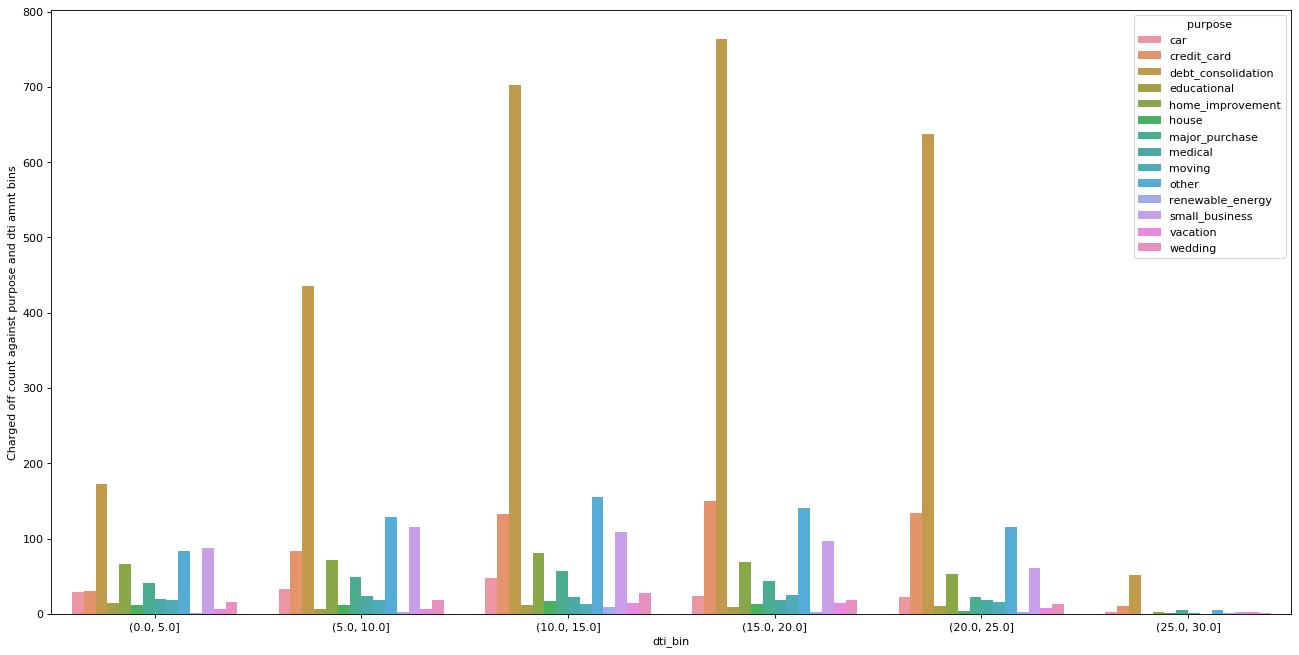

In [101]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='dti_bin', y='defaulted', hue="purpose", data=dti_purpose)
plt.ylabel('Charged off count against purpose and dti amnt bins')
plt.show()

In [102]:
int_rate_purpose=loan.groupby(['purpose','int_rate_bin'])['defaulted'].sum().reset_index()
int_rate_purpose.head()

,purpose,int_rate_bin,defaulted
0,car,"(5.0, 10.0]",40
1,car,"(10.0, 15.0]",77
2,car,"(15.0, 20.0]",42
3,car,"(20.0, 25.0]",1
4,credit_card,"(5.0, 10.0]",87


### More defaults occurred for interest rate of range (20.0 - 25.0), that too under Source verified category

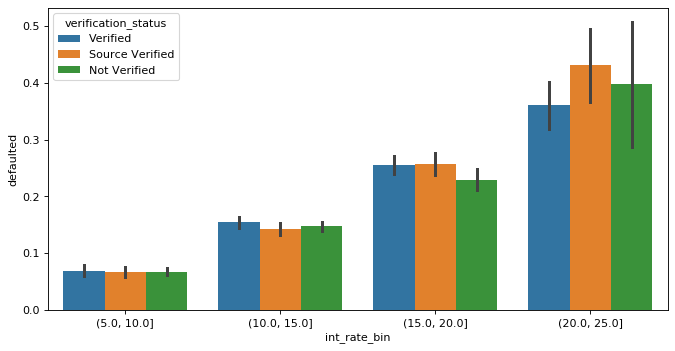

In [103]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='int_rate_bin', y='defaulted', hue="verification_status", data=loan)
plt.show()

### For interest rate (20.0 - 25.0), the Top three purposes with high default rate are Renewable energy, Car and Medical

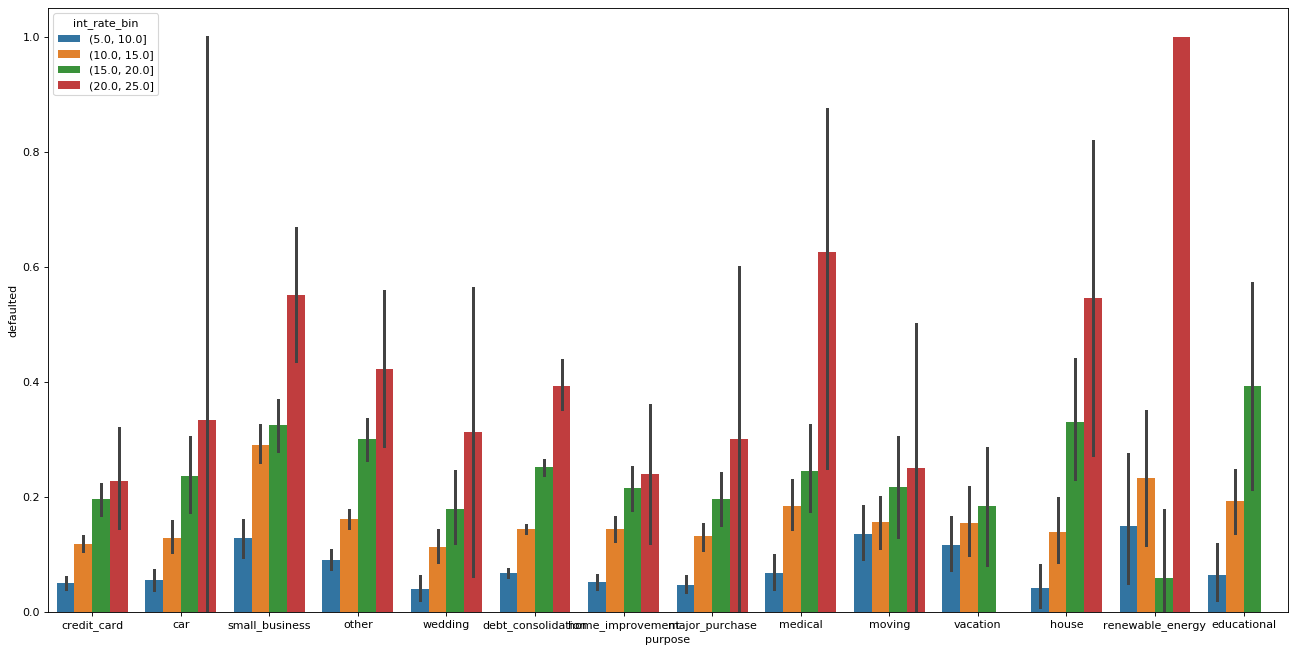

In [104]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='purpose', y='defaulted', hue="int_rate_bin", data=loan)
plt.show()

### Any Interest rate range with borrowers of DTI >= 12% should be avoided

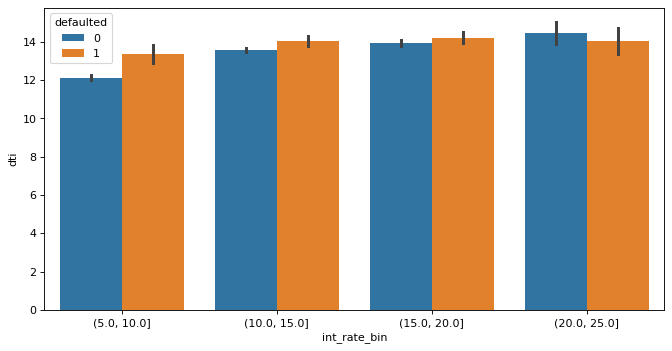

In [105]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='int_rate_bin', y='dti', hue="defaulted", data=loan)
plt.show()

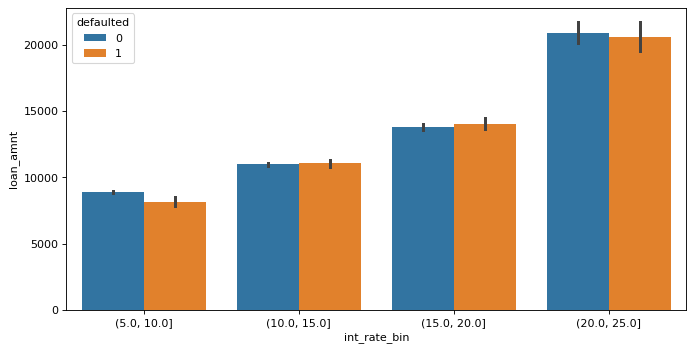

In [106]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='int_rate_bin', y='loan_amnt', hue="defaulted", data=loan)
plt.show()

## Bivariate Analysis - Scatter Plots

### Loan amount and Total recovered interest are in positive correlation

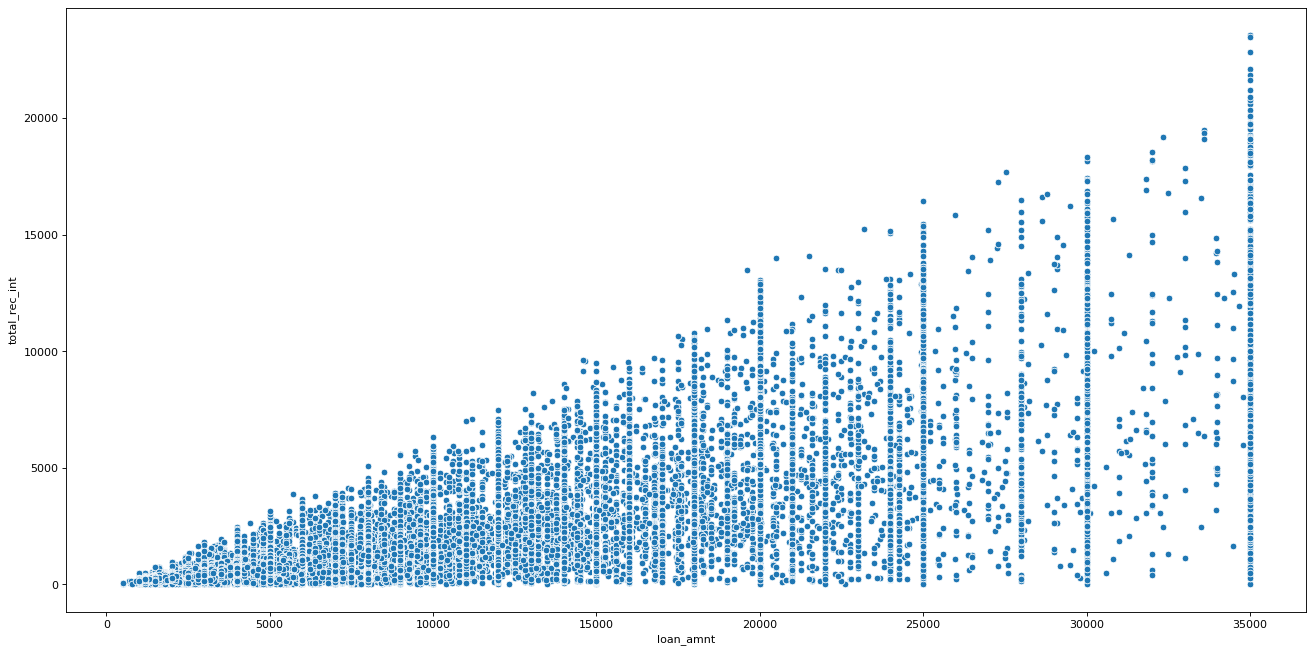

In [107]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x='loan_amnt', y='total_rec_int', data=loan)
plt.show()

### Interest rate is in negative correlation with funded amount invested

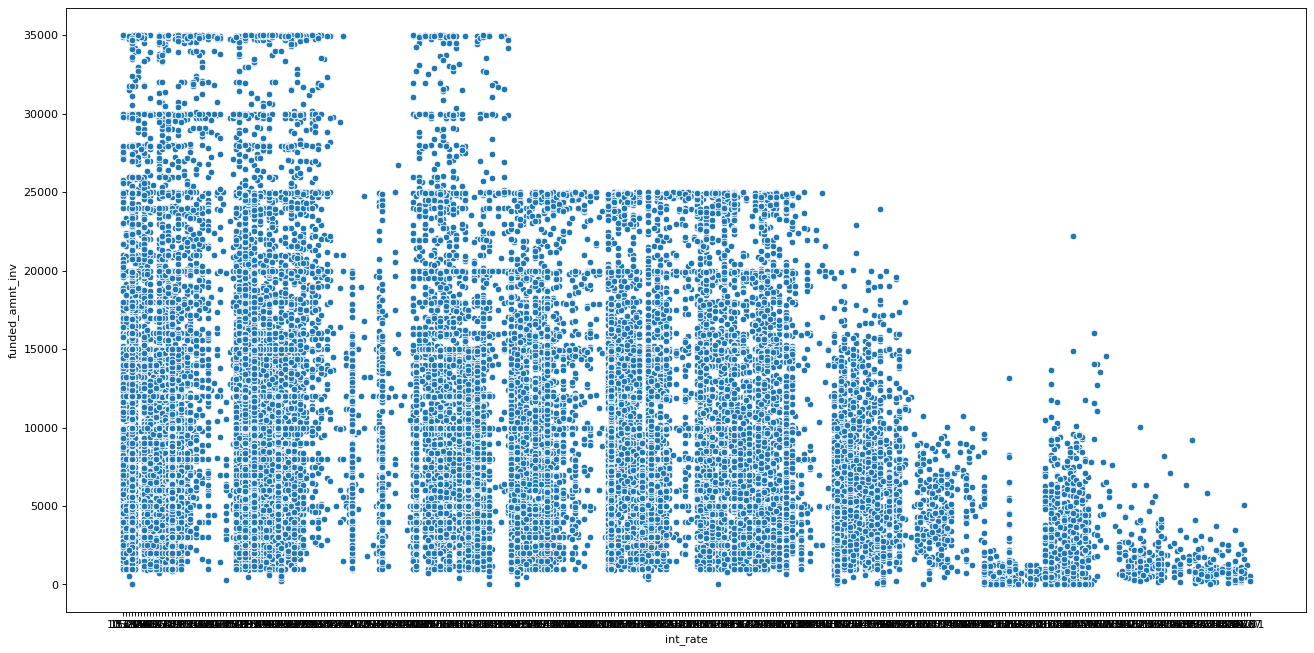

In [108]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x='int_rate', y='funded_amnt_inv', data=loan)
plt.show()

## BoxPlots of numerical columns with respect to loan_status

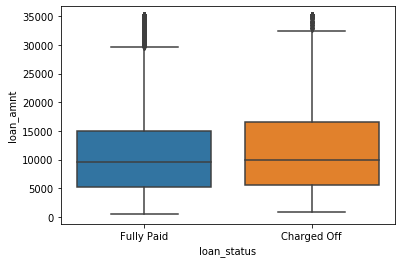

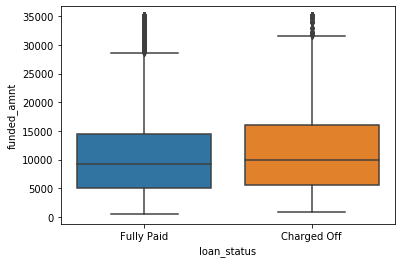

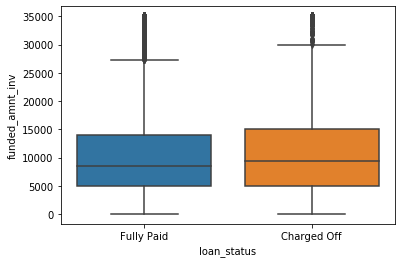

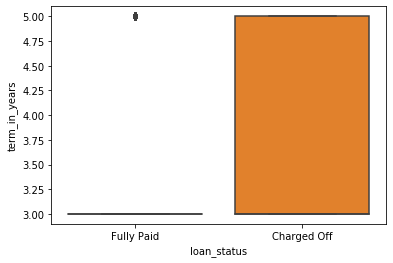

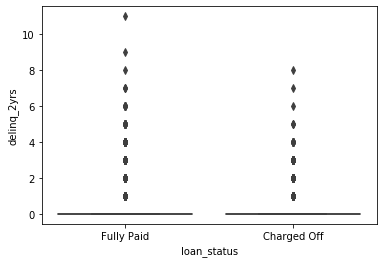

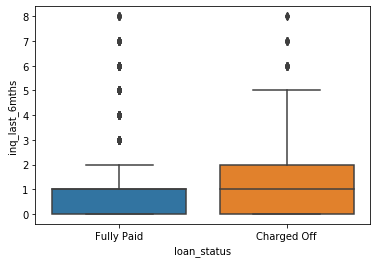

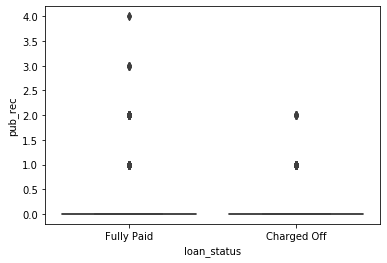

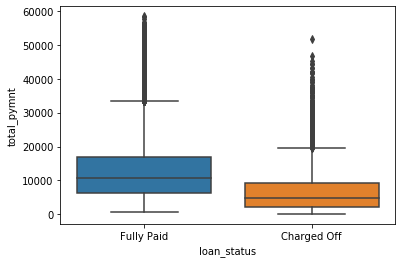

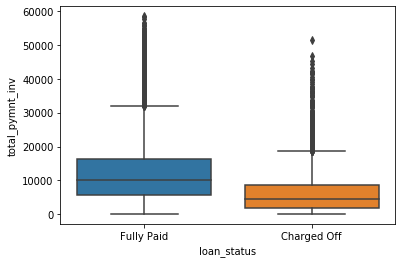

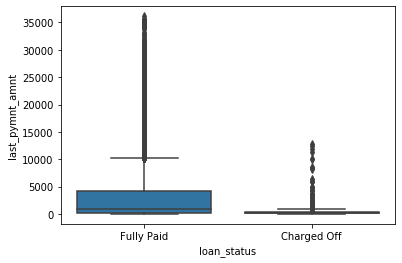

In [109]:
col_list = ['loan_amnt','funded_amnt','funded_amnt_inv','term_in_years','delinq_2yrs','inq_last_6mths','pub_rec','total_pymnt','total_pymnt_inv','last_pymnt_amnt']
for col in col_list:
    sns.boxplot(x='loan_status', y=col, data=loan)
    plt.show()

## Observations from Box Plots

**1.** Here We can see that borrowers borrowing money greater than 30000 are majorly charged Off. Also the upper quartile for charged off is above 15000

**2.** The borrowers having funded amount greater than 29000 and majorly being charged off. Also the upper quartile for charged off is above 15000.**

**3.** Upper quartile for Charged Off is 16.45% whereas for Fully paid is 14%.

**4.** The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years is not exceeding 8 for charged off.

**5.** The upper quartile for charged off is 2. Maximum count for charged off is 5 whereas for fullypaid is 2.

**6.** The count for derogatory public records is not exceeding 2 in case of charged off.

**7.** For charged Off upper quartile is 9477. For Fully Paid upper quartile is 17121. Max amount for charged of is 20000.Max amount for fully paid is 34000.

**8.** The upper quartile for charged off is below 8952. The upper quartile for fully paid is below 16484. Max payment inv for charged off is 20000 while for fully paid is 30000.

**9.** Upper quartile for charged off is Rs 409 where for fully paid it is Rs 4382.




## Analysis of box plot
Major variating feilds

**1.loan_amnt**
Charged Off Loan amount is slightly larger as compared to fully paid

**2.funded_amnt**
Charged Off Loan amount is sligntly larger as compared to fully paid

**3.funded_amnt_inv**
funded_amnt_inv amount is slightly larger as compared fully paid

**4.term**
Loan whose term is greater than 3 years are likely to be charged off.

**5.delinq_2yrs**
for charged off delinq_2yrs in not greater than 8 years.

**6.inq_last_6mths**
for charged off inq_last_6mths in greater as compared to other and reached till 2.

**7.public_rec**
for charged off pub_rec(number of derogatory record) not exceeding 2.

**8.total_pymnt**
For charged off total_pymnt is significantly lower and is not exceeding 10000.

**9.total_pymnt_inv**
For charged off total_pymnt_inv is significantly lower and is not exceeding 10000.

**10.total_rec_prncp**
For charged off total_rec_prncp is significantly lower and is not exceeding 5000.

**11.last_pymnt_amnt**
For charged off total_rec_prncp is significantly lower and is not exceeding 5000.


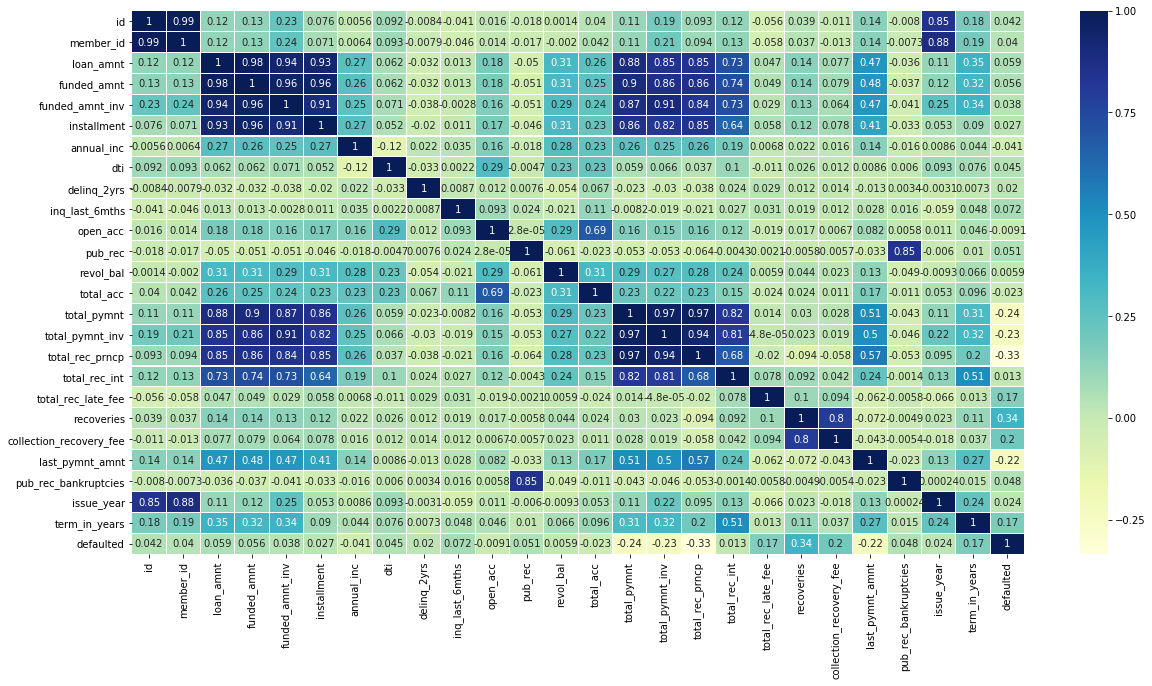

In [110]:
# Heat Map of entire loan data frame
  
f, ax = plt.subplots(figsize =(20, 10)) 
sns.heatmap(loan.corr(), ax= ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)
plt.show()

## Heat Map & Correlation Analysis

### All feature which are in negative correlation with loan defaulted.

**1.last_payment_amnt**
last_payment_amnt has negative correlation with defaulted i.e if last payment amount less than borrowed is more likely to Default loan.

**2.total_rec_prncp**
total_rec_prncp has negative correlation with defaulted i.e if priciple recieved to date amount is less than borrowed is more likely to Default loan.

**3.total_pymnt_inv**
total_pymnt_inv has negative correlation with defaulted i.e if Payments received to date for portion of total amount funded by investors is less than borrowed is more likely to Default loan.

**4.total_pymnt**
total_pymnt has negative correlation with defaulted i.e if Payments received to date for portion of total amount funded is less than borrowed is more likely to Default loan.


### All feature which are in Positive correlation with loan defaulted.


**1.recoveries**
Post charge off gross recovery is in positive correlation with loan defaulted i.e. if recoveries increase then chances of loan defaulted also increases.

**2.collection_recovery_fee**
Post charge off collection fee is in positive correlation with loan defaulted i.e. if recoveries increase then chances of loan defaulted also increases.


**3.int_rate**
Interest rate is in positive correlation with loan defaulted i.e. if interest rate increase then chances of loan defaulted also increases.

### Other Insights

1.last_pymnt_amnt is in postive correlation with loan_amnt, funded_amnt, funded_amnt_inv, total_pmnt, total_pmnt_inv and total_rec_prncp.

2.Public recovery is highly correlated with bankrupties.

3.recovery is highly correlated with collection_rec_fee.

4.int_rate is highly correlated with total_rec_int